In [9]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.shape

(569, 33)

In [12]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print("--------")
print(X_test)

[[ 0.31238941 -0.48750483  0.43476793 ...  1.65898863  0.58272325
   1.94072344]
 [ 0.90062323  1.43127539  0.89415409 ... -0.07417854 -2.05592866
  -0.85781897]
 [ 0.05748808  0.08187989  0.14328131 ... -0.19381309 -0.98930744
   0.23093054]
 ...
 [ 0.55048405 -0.76525347  0.56079422 ...  0.15895545  0.41531633
   0.31941548]
 [-0.2310266   2.62559456 -0.25065249 ... -0.56912814 -1.11047816
  -0.38681527]
 [ 0.21435044  0.08882361  0.12173488 ... -0.87726379 -0.39301994
  -1.26067278]]
--------
[[ 0.69614195  0.19066478  0.59331713 ... -0.41973833  2.84510818
  -0.41539426]
 [ 0.23956046  0.10502561  0.31687236 ...  1.48413813 -0.09328183
  -0.07959115]
 [-1.5346648  -0.8208032  -1.4905886  ... -0.14933358  0.05339851
   0.98442654]
 ...
 [ 0.11351035 -0.85320721  0.0070916  ... -0.86821451 -0.57796472
  -1.47501518]
 [ 2.54487683  1.68819288  2.69917583 ...  2.43201186  0.48706215
   0.21059549]
 [-0.72402257 -0.27687877 -0.65556277 ...  0.41202853 -0.37069901
   0.48979022]]


In [16]:
y_train

257    M
213    M
290    B
331    B
249    B
      ..
272    M
306    B
375    B
455    B
165    B
Name: diagnosis, Length: 455, dtype: object

### Label Encoding

In [17]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [18]:
y_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,

### Numpy arrays to PyTorch tensors

In [19]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [20]:
X_train_tensor.shape

torch.Size([455, 30])

In [21]:
y_train_tensor.shape

torch.Size([455])

### Defining the model

In [22]:
class MySimpleNN():

  def __init__(self, X):

    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss





### Important Parameters

In [23]:
learning_rate = 0.1
epochs = 100

### Training Pipeline

In [24]:
# create model
model = MySimpleNN(X_train_tensor)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(X_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 4.091995038300658
Epoch: 2, Loss: 3.9858238007895936
Epoch: 3, Loss: 3.871859315688706
Epoch: 4, Loss: 3.7515464969810046
Epoch: 5, Loss: 3.624713241317096
Epoch: 6, Loss: 3.4930350432165578
Epoch: 7, Loss: 3.357370910689404
Epoch: 8, Loss: 3.21735146275402
Epoch: 9, Loss: 3.075156844636131
Epoch: 10, Loss: 2.927954573984924
Epoch: 11, Loss: 2.7760480133433454
Epoch: 12, Loss: 2.6189637593282957
Epoch: 13, Loss: 2.4546899970606213
Epoch: 14, Loss: 2.289927395569855
Epoch: 15, Loss: 2.122075719955432
Epoch: 16, Loss: 1.9544820929086903
Epoch: 17, Loss: 1.7866998802411767
Epoch: 18, Loss: 1.6232570987613717
Epoch: 19, Loss: 1.466372307624537
Epoch: 20, Loss: 1.3192816942575187
Epoch: 21, Loss: 1.1883098792316402
Epoch: 22, Loss: 1.0756775971868153
Epoch: 23, Loss: 0.982722747223002
Epoch: 24, Loss: 0.9094508772181501
Epoch: 25, Loss: 0.8543846996119457
Epoch: 26, Loss: 0.8148107934035176
Epoch: 27, Loss: 0.7873236248051042
Epoch: 28, Loss: 0.7684917347900921
Epoch: 29, Lo

In [25]:
model.bias

tensor([-0.4278], dtype=torch.float64, requires_grad=True)

### Evaluation

In [26]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.6578947305679321


In [28]:
params_dict = {
    'weights': model.weights,
    'bias': model.bias
}

In [29]:
print(params_dict)

{'weights': tensor([[ 0.2204],
        [ 0.1496],
        [ 0.2368],
        [ 0.2027],
        [ 0.0087],
        [ 0.0751],
        [ 0.0960],
        [-0.1525],
        [-0.0404],
        [-0.0793],
        [-0.1857],
        [ 0.2224],
        [-0.4251],
        [ 0.4436],
        [ 0.0306],
        [-0.3625],
        [ 0.3923],
        [-0.1194],
        [ 0.0942],
        [-0.0255],
        [-0.0891],
        [-0.2531],
        [ 0.2915],
        [-0.3899],
        [ 0.0294],
        [ 0.0856],
        [-0.4219],
        [-0.1013],
        [ 0.0549],
        [ 0.4268]], dtype=torch.float64, requires_grad=True), 'bias': tensor([-0.4278], dtype=torch.float64, requires_grad=True)}


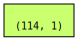

In [31]:
from torchviz import make_dot
from IPython.display import display
from graphviz import Source


dot = make_dot(y_pred, params=params_dict)
display(Source(dot.source))